In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go
from plotly.offline import init_notebook_mode,iplot

In [3]:
df = pd.read_csv('vgsales.csv')

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].fillna(0).astype(int)

In [14]:
df['Year'] = df['Year'].astype(int)

In [15]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<Axes: title={'center': 'MOST SELLING GAMES BY GENRE'}, xlabel='Genre', ylabel='count'>

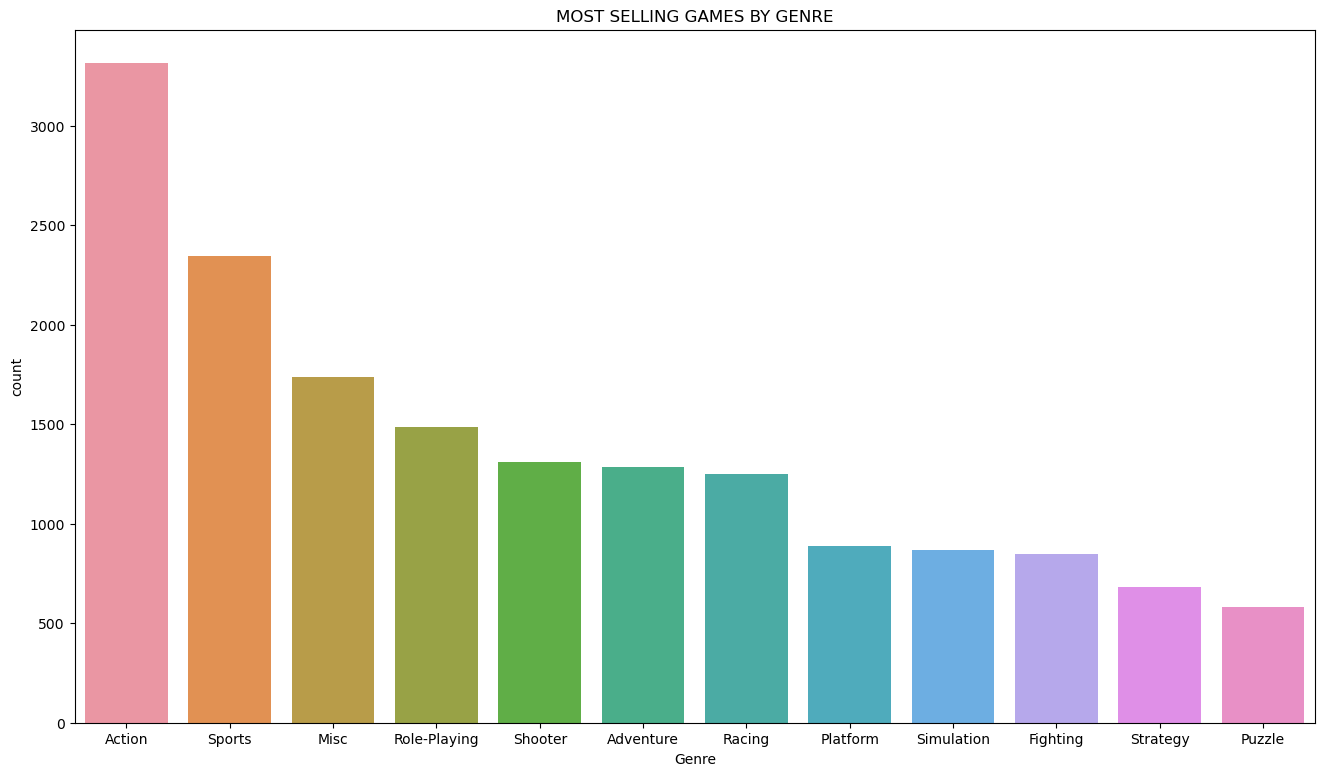

In [17]:
plt.figure(figsize=(16,9)) # Setting the figure size of the chart
plt.title('MOST SELLING GAMES BY GENRE')
sns.countplot(data=df, x = 'Genre', order = df['Genre'].value_counts().index)# using Genre as the X axis and sales count per genre for the Y axis

In [27]:
#Sort the DF by multiple sales columns in descending order and select top 10 rows
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales (In Millions)",
    'EU_Sales' : "Europe Sales (In Millions)",
    'JP_Sales' : "Japan Sales (In Millions)",
    'Other_Sales' : "Other Sales (In Millions)",
}
#Iterating over each sales column and its corresponding title in the dictonary
for (key, title) in dicts_name.items():
    #Creating a sunburst chart for the top 10 dales data, showing hierarchy by Genre
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    #Update layout of the chart:
    # Grid settings and adjusting the margin around the chart for improved spacing
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )
#Displaying the chart
    fig.show()

In [25]:
#Creating the variables to deploy Genre based sales stacked chart
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xplatform=df[df.Genre=="Platform"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

In [26]:
#Creating a histogram for All the above listed Genres; grouped by platform
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))
#Combining the histograms above into a single list
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
#Plot layout 
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
#Creating the figure object with data & layout
fig = go.Figure(data=data, layout=layout)
#Display the plot
iplot(fig)

In [37]:
# Aggregate the sales by platform
action_sales = xaction.groupby('Platform')['Global_Sales'].sum()
sports_sales = xsports.groupby('Platform')['Global_Sales'].sum()
misc_sales = xmisc.groupby('Platform')['Global_Sales'].sum()
role_sales = xrole.groupby('Platform')['Global_Sales'].sum()
shooter_sales = xshooter.groupby('Platform')['Global_Sales'].sum()
adventure_sales = xadventure.groupby('Platform')['Global_Sales'].sum()
race_sales = xrace.groupby('Platform')['Global_Sales'].sum()
platform_sales = xplatform.groupby('Platform')['Global_Sales'].sum()
simulation_sales = xsimulation.groupby('Platform')['Global_Sales'].sum()
fight_sales = xfight.groupby('Platform')['Global_Sales'].sum()
strategy_sales = xstrategy.groupby('Platform')['Global_Sales'].sum()
puzzle_sales = xpuzzle.groupby('Platform')['Global_Sales'].sum()

# Create bar traces for each genre
trace1 = go.Bar(x=action_sales.index, y=action_sales.values, name="Action", marker=dict(color='rgb(165,0,38)'))
trace2 = go.Bar(x=sports_sales.index, y=sports_sales.values, name="Sports", marker=dict(color='rgb(215,48,39)'))
trace3 = go.Bar(x=misc_sales.index, y=misc_sales.values, name="Misc", marker=dict(color='rgb(244,109,67)'))
trace4 = go.Bar(x=role_sales.index, y=role_sales.values, name="Role Playing", marker=dict(color='rgb(253,174,97)'))
trace5 = go.Bar(x=shooter_sales.index, y=shooter_sales.values, name="Shooter", marker=dict(color='rgb(254,224,144)'))
trace6 = go.Bar(x=adventure_sales.index, y=adventure_sales.values, name="Adventure", marker=dict(color='rgb(170,253,87)'))
trace7 = go.Bar(x=race_sales.index, y=race_sales.values, name="Racing", marker=dict(color='rgb(171,217,233)'))
trace8 = go.Bar(x=platform_sales.index, y=platform_sales.values, name="Platform", marker=dict(color='rgb(116,173,209)'))
trace9 = go.Bar(x=simulation_sales.index, y=simulation_sales.values, name="Simulation", marker=dict(color='rgb(69,117,180)'))
trace10 = go.Bar(x=fight_sales.index, y=fight_sales.values, name="Fighting", marker=dict(color='rgb(49,54,149)'))
trace11 = go.Bar(x=strategy_sales.index, y=strategy_sales.values, name="Strategy", marker=dict(color="rgb(10,77,131)"))
trace12 = go.Bar(x=puzzle_sales.index, y=puzzle_sales.values, name="Puzzle", marker=dict(color='rgb(1,15,139)'))

# Combine all traces
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

# Layout settings
layout = go.Layout(
    barmode='stack',
    title='Total Sales by Genre According to Platform',
    xaxis=dict(title='Platform'),
    yaxis=dict(title='Total Sales (in millions)'),
    hovermode='x', #this enables the stacked hover legend on the stacked bar graphs
    paper_bgcolor='beige',
    plot_bgcolor='beige'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()
fig.write_image("genre_sales_by_platform.png", width=1200, height=800)

